In [1]:
#use sklearn to generate some fake data
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline
#make it pretty
plt.style.use('ggplot')

In [6]:
X, y, coef = make_regression(
    n_samples = 10,
    n_features = 1,
    n_informative = 1,# the number of features used to build the linaer model
    bias = 10,
    noise = 10,
    coef = True,
    random_state = 0)
print(X)
print(y)
print(coef)

[[ 0.40015721]
 [-0.10321885]
 [ 0.4105985 ]
 [-0.97727788]
 [ 0.97873798]
 [ 0.95008842]
 [ 2.2408932 ]
 [-0.15135721]
 [ 1.86755799]
 [ 1.76405235]]
[  52.48956723   -7.77964105   46.27738121  -53.27149035   92.33225832
   81.47616194  193.20853013    0.76865401  156.04341636  175.11644886]
79.17250380826646


In [19]:
help(make_regression)

Help on function make_regression in module sklearn.datasets.samples_generator:

make_regression(n_samples=100, n_features=100, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
    Generate a random regression problem.
    
    The input set can either be well conditioned (by default) or have a low
    rank-fat tail singular profile. See :func:`make_low_rank_matrix` for
    more details.
    
    The output is generated by applying a (potentially biased) random linear
    regression model with `n_informative` nonzero regressors to the previously
    generated input and some gaussian centered noise with some adjustable
    scale.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The number of samples.
    
    n_features : int, optional (default=100)
        The number of features.
    
    n_informat

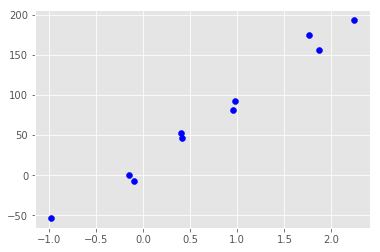

In [7]:
plt.scatter(X,y, color = "blue")

In [8]:
def hypothesis_linreg(X, coeffs):
    '''
    INPUT: 2 dimensional numpy array, numpy array
    OUTPUT: numpy array
    Calculate the hypothesis for the given data with the given coefficients.
    '''
    return X.dot(coeffs)
#get the SSR
def cost_linreg(X, y, coeffs):
    '''
    INPUT: 2 dimensional numpy array, numpy array
    OUTPUT: numpy array

    Calculate the cost for the given data with the given coefficients.
    '''
    y_pred = hypothesis_linreg(X, coeffs)
    return np.sum((y-y_pred)**2)
#guess a coefficient
coeffs = y.mean()/X.mean()
#get the prediction
y_pred = hypothesis_linreg(X, coeffs)

print ("X: ", X)
print ("y: ", y)
print ("y_pred: ", y_pred)
print ("RSS: ", cost_linreg(X, y, coeffs))

X:  [[ 0.40015721]
 [-0.10321885]
 [ 0.4105985 ]
 [-0.97727788]
 [ 0.97873798]
 [ 0.95008842]
 [ 2.2408932 ]
 [-0.15135721]
 [ 1.86755799]
 [ 1.76405235]]
y:  [  52.48956723   -7.77964105   46.27738121  -53.27149035   92.33225832
   81.47616194  193.20853013    0.76865401  156.04341636  175.11644886]
y_pred:  [[  39.94187929]
 [ -10.30283807]
 [  40.9840819 ]
 [ -97.54744959]
 [  97.69319058]
 [  94.83352066]
 [ 223.67580489]
 [ -15.10779068]
 [ 186.41117603]
 [ 176.07971165]]
RSS:  1542165.7186


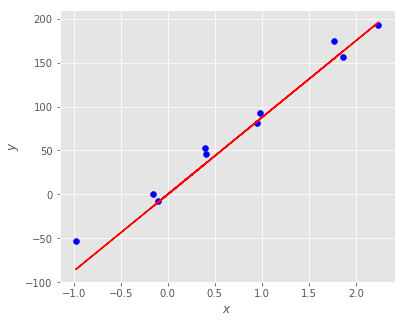

In [14]:
def plot_reg_1d_data(X,y,y_pred, ax):
    ax.scatter(X,y, color = "blue")
    ax.plot(X, y_pred, color = "red")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
fig, ax = plt.subplots(1, figsize = (6,5))
plot_reg_1d_data(x,y, y_pred, ax)

In [11]:
#solve for coefficients
coeffs = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)), X.T), y)
coeffs
#also can use
coeffs2 = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
coeffs2

array([ 87.42539487])

In [12]:
y_pred = hypothesis_linreg(X, coeffs)
print("X: ",X)
print("y:", y)
print("y_pred: ", y_pred)
print("RSS:", cost_linreg(X,y, coeffs))

X:  [[ 0.40015721]
 [-0.10321885]
 [ 0.4105985 ]
 [-0.97727788]
 [ 0.97873798]
 [ 0.95008842]
 [ 2.2408932 ]
 [-0.15135721]
 [ 1.86755799]
 [ 1.76405235]]
y: [  52.48956723   -7.77964105   46.27738121  -53.27149035   92.33225832
   81.47616194  193.20853013    0.76865401  156.04341636  175.11644886]
y_pred:  [  34.98390195   -9.02394888   35.89673616  -85.43890454   85.56655473
   83.06185506  195.9109728   -13.2324637   163.27199473  154.22297292]
RSS: 2190.9102896


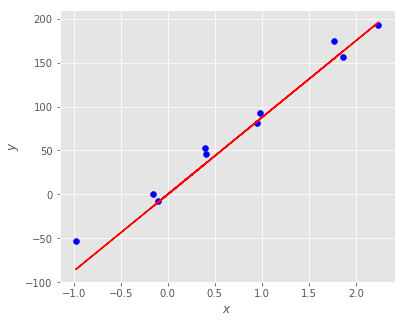

In [16]:
fig, ax = plt.subplots(1, figsize = (6,5))
plot_reg_1d_data(X,y,y_pred, ax)

In [19]:
def add_intercept(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))
print(X)
print( add_intercept(X))

[[ 0.40015721]
 [-0.10321885]
 [ 0.4105985 ]
 [-0.97727788]
 [ 0.97873798]
 [ 0.95008842]
 [ 2.2408932 ]
 [-0.15135721]
 [ 1.86755799]
 [ 1.76405235]]
[[ 1.          0.40015721]
 [ 1.         -0.10321885]
 [ 1.          0.4105985 ]
 [ 1.         -0.97727788]
 [ 1.          0.97873798]
 [ 1.          0.95008842]
 [ 1.          2.2408932 ]
 [ 1.         -0.15135721]
 [ 1.          1.86755799]
 [ 1.          1.76405235]]


[ 14.46965418  80.20950674]
X:  [[ 1.          0.40015721]
 [ 1.         -0.10321885]
 [ 1.          0.4105985 ]
 [ 1.         -0.97727788]
 [ 1.          0.97873798]
 [ 1.          0.95008842]
 [ 1.          2.2408932 ]
 [ 1.         -0.15135721]
 [ 1.          1.86755799]
 [ 1.          1.76405235]]
y: [  52.48956723   -7.77964105   46.27738121  -53.27149035   92.33225832
   81.47616194  193.20853013    0.76865401  156.04341636  175.11644886]
y_pred:  [  46.56606648    6.19052099   47.40355749  -63.91732251   92.97374511
   90.67577751  194.21059234    2.32936716  164.26555937  155.96342271]
RSS: 867.781736677


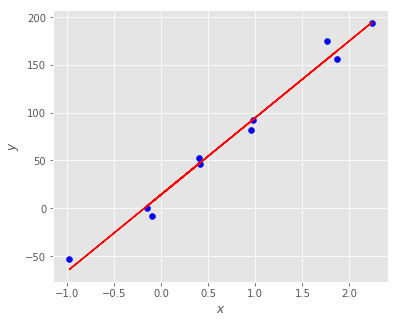

In [22]:
X_ = add_intercept(X)
coeffs_ = np.dot(np.dot(np.linalg.inv(np.dot(X_.T, X_)), X_.T), y)
print(coeffs_)
y_pred = hypothesis_linreg(X_, coeffs_)

print("X: ",X_)
print("y:", y)
print("y_pred: ", y_pred)
print("RSS:", cost_linreg(X_,y, coeffs_))
fig, ax = plt.subplots(1, figsize = (6,5))
plot_reg_1d_data(X,y,y_pred, ax)

In [8]:
from sklearn.datasets import make_classification
X, y = make_classification(
       n_samples = 100,
       n_features = 2,
       n_informative = 2,
       n_redundant = 0,
       n_classes = 2,
       random_state = 0)
print(X[0:10])#2 features
print(y[0:10])#labels

[[-0.76605469  0.18332468]
 [-0.92038325 -0.0723168 ]
 [-0.98658509 -0.28692   ]
 [ 1.70910242 -1.10453952]
 [ 1.9876467   1.77624479]
 [ 3.86274219  2.63325914]
 [-1.12836011 -0.42276158]
 [-1.10074198 -2.56042975]
 [-1.53716448  1.10502647]
 [-0.32372692  0.55626974]]
[0 0 0 1 1 1 0 0 1 1]


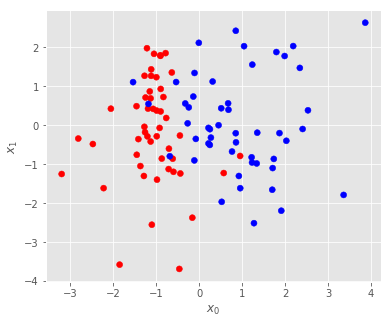

In [13]:
def plot_classification_data(X,y,ax):
    colors = np.array(['red', 'blue'])[y]
    ax.scatter(X[:, 0], X[:,1], color = colors)
    ax.set_xlabel("$x_0$")
    ax.set_ylabel("$x_1$")
fig, ax = plt.subplots(1, figsize = (6,5))
plot_classification_data(X,y,ax)

In [11]:
#just make an estimated for the coefficient for y = mx, looks like aboundary will corss
#(0,0), (-1,2), then m = -2
#find the max, min position of x
def compute_scatterplot_bounds(X):
    x0_bounds = (X[:,0].min(), X[:,0].max())
    x1_bounds = (X[:,1].min(), X[:,1].max())
    return x0_bounds, x1_bounds
print(compute_scatterplot_bounds(X))

((-3.198263394150648, 3.8627421878639634), (-3.6974359976891638, 2.6332591353317136))


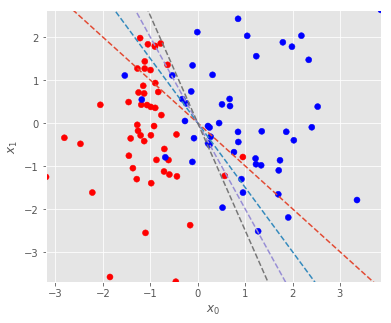

In [19]:
def set_scatterplot_bounds(x0_bounds, x1_bounds, ax):
    ax.set_xlim(x0_bounds)
    ax.set_ylim(x1_bounds)

#try m = [-1.5, -2.5], by step = 0.5
def plot_rough_estimate_line_no_intercept(X, m, ax):
    x0_bounds, x1_bounds = compute_scatterplot_bounds(X)
    t = np.linspace(x0_bounds[0], x0_bounds[1], num = 3)
    ax.plot(t, m*t, linestyle = "--", label = 'rough estimate')
    set_scatterplot_bounds(x0_bounds, x1_bounds, ax)
    
fig, ax = plt.subplots(1, figsize = (6,5))
plot_classification_data(X,y, ax)
for m in np.arange(-1, -3, -0.5):
    plot_rough_estimate_line_no_intercept(X, m, ax)
#we can find roughly, the second slopest line is better boundar, which means m =2    

Now use Logistic regression

In [30]:
#g(z) = 1/(1+e^(-z))
def predict_proba(X, coeffs):
    #get the predicted precentage for the given data with given coeffs
    Z = X.dot(coeffs)
    return 1/(1+np.exp(-Z))
def predict(X, coeffs, thres = 0.5):
    return (predict_proba(X, coeffs)>thres).astype(int)

In [31]:
#now calculate the likelihood 
#P(predict Xi correctly) = f(xi)^yi(1-f(xi))^(1-yi)
#L = 联乘
#l = log(L) = sum(yi*log(f(xi))+(1-yi)*log(1-f(xi)))
def log_likelihood(X, y, coeffs):
    p = predict_proba(X, coeffs)
    return np.sum(y*np.log(p)+(1-y)*np.log(1-p))

In [23]:
coeffs = np.random.random(X.shape[1])
print(X[0:10, ])
print(y[0:10])
print(coeffs)

[[-0.76605469  0.18332468]
 [-0.92038325 -0.0723168 ]
 [-0.98658509 -0.28692   ]
 [ 1.70910242 -1.10453952]
 [ 1.9876467   1.77624479]
 [ 3.86274219  2.63325914]
 [-1.12836011 -0.42276158]
 [-1.10074198 -2.56042975]
 [-1.53716448  1.10502647]
 [-0.32372692  0.55626974]]
[0 0 0 1 1 1 0 0 1 1]
[ 0.54456434  0.82347496]


In [28]:
log_likelihood(X, y, coeffs)

-55.623860483748764

In [32]:
p = predict_proba(X, coeffs)
y_hat = predict(X, coeffs)
cost = log_likelihood(X, y, coeffs)
print("The predicted probability vector is {}".format(str(p)))
print("The predicted class vector is {}".format(str(y_hat)))
print("The cost function at these coefficients is {}".format(str(cost)))

The predicted probability vector is [ 0.43383954  0.36337186  0.31571588  0.5052887   0.92724328  0.9862373
  0.27635828  0.06251029  0.51821111  0.56998356  0.14464831  0.58695722
  0.58715532  0.21118889  0.48782211  0.42931732  0.14839793  0.63946157
  0.72448512  0.30237704  0.65016838  0.36021529  0.68396178  0.94605501
  0.65380811  0.1399444   0.74905019  0.47109196  0.42591951  0.30829169
  0.87584002  0.29286032  0.47919329  0.058578    0.46421811  0.46637852
  0.22050851  0.7734412   0.66719012  0.56064368  0.40306521  0.39118372
  0.15593816  0.47295789  0.01867367  0.73984737  0.20062736  0.38595325
  0.85040254  0.07277005  0.56924     0.56068276  0.57237906  0.44057958
  0.61599459  0.53526297  0.47619695  0.46949162  0.72629566  0.33090544
  0.51474416  0.11434572  0.21175275  0.90373789  0.30673211  0.72824897
  0.32523679  0.51247241  0.45054     0.45177221  0.29025453  0.49581074
  0.92315091  0.25988705  0.92585345  0.75004476  0.62948557  0.55706753
  0.6831238   0.

In [66]:
#use gradient ascent to find the max log_likelihood
#the gradient for each parameter is dg(z)/dbetaj = sum(yi-f(xi))xij
def log_likelihood_gradient(X, y, coeffs):
    p = predict_proba(X, coeffs)
    grad = X.T.dot(y-p)
    return grad
gradient = log_likelihood_gradient(X, y, coeffs)
print("The gradient of the cost is \n{}".format(str(gradient)))

The gradient of the cost is 
[  9.23916330e-16   4.92713664e-16]


In [69]:
#implement gradient ascent, alpha is the learning rate
coeffs = np.random.random(X.shape[1])
def GradientAscent(X, y, coeffs, alpha = 0.1, num_iterations = 1000):
    cost_record = []
    for i in range(num_iterations):
        gradient = log_likelihood_gradient(X,y, coeffs)
        coeffs = coeffs +alpha *gradient
        cost = log_likelihood(X,y, coeffs)
        cost_record.append(cost)
    return coeffs, cost_record
coeffs, cost_record = GradientAscent(X, y, coeffs, alpha = 0.05)

In [72]:
print(coeffs)
num_iterations = 1000
print(cost_record[::100])
def plot_cost(cost_record, ax, alpha = 1.0):
    ax.plot(range(len(cost_record)), cost_record, alpha = alpha)
    ax.set_title("Logistic Regression Cost Function Over Time")
    ax.set_xlabel("Iteration Number")
    ax.set_ylabel("Cost")
    ax.set_ylim(min(cost_record), max(cost_record)+0.5)
print(min(cost_record))

[ 2.70706753  0.61488544]
[-31.153293084009391, -29.837387541670232, -29.534796416101614, -29.374989534623431, -29.280540392097382, -29.222093938580205, -29.184801149857872, -29.160467195131982, -29.144317949442932, -29.133459243330826, -29.126082295377685, -29.121029404774465, -29.117545444346316, -29.115130335793264, -29.113448806608073, -29.112273809245274, -29.111450314637974, -29.110871746796544, -29.110464426091109, -29.110177176901871, -29.109974315779123, -29.109830880749097, -29.109729362537941, -29.109657451582176, -29.109606477405865, -29.109570323043975, -29.109544667232917, -29.109526453825133, -29.109513519360721, -29.10950433109754, -29.109497802409074, -29.109493162504659, -29.109489864369767, -29.109487519643892, -29.109485852512211, -29.109484667034501, -29.109483823980579, -29.109483224396943, -29.109482797943592, -29.109482494612905, -29.109482278848098, -29.109482125364732, -29.109482016181538, -29.109481938509987, -29.109481883254187, -29.109481843944263, -29.1094

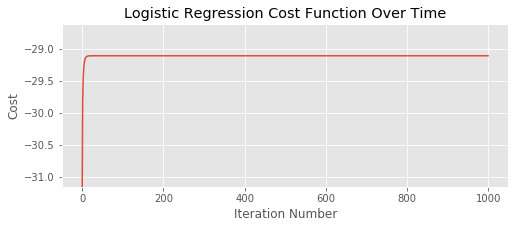

In [73]:
fig, ax = plt.subplots(1, figsize=(8, 3))
plot_cost(cost_record, ax)

In [ ]:
#put all together
import numpy as np
def predict_proba(X,coeffs):
    pass
def predict(X, coeffs, thres = 0.5):
    pass
def log_likelihood(X, y, coeffs):
    pass
def log_likelihood_gradient(X, y, coeffs):
    pass

In [78]:
class GradientAscent(object):
    def __init__(self, cost, gradient, predict_func, fit_intercept = False):
        '''
        cost:the cost function to be maximized
        gradient: funtion to get the gradient of cost
        predict_func: to get predictions
        fit_intercept: whether to estimate the bias or not
        '''
        #initialize coefficients in run method once to know how many features we have
        self.coeffs = None
        self.cost = cost
        self.gradient = gradient
        self.predict_func = predict_func
        self.fit_intercept = fit_intercept
    def run(self, X, y, alpha = 0.1, num_iterations = 10000):
        if self.fit_intercept:
            #add intercept(if initialized with fit_intercept)
            X = self.add_intercept(X)
            #initialize coeffs to all 0s
            self.coeffs = np.zeros(X.shape[1])
            self.cost_record = []
            pass
    def predict(self, X):
        pass
    def add_intercept(self, X):
        pass
    

In [84]:
ga = GradientAscent(cost = log_likelihood, 
                   gradient = log_likelihood_gradient,
                   predict_func = predict,
                   fit_intercept = False)
ga.run(X, y, alpha = 0.1, num_iterations = 1000)

In [81]:
y_pred = ga.predict(X)
coeffs = ga.coeffs
#gradient = ga.gradient(X, y_pred, coeffs)
print("The predicted class vector is \n{}".format(str(y_pred)))
print("The actual class vector is \n{}".format(str(y)))

The predicted class vector is 
None
The actual class vector is 
[0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0
 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0]


AttributeError: 'GradientAscent' object has no attribute 'cost_record'

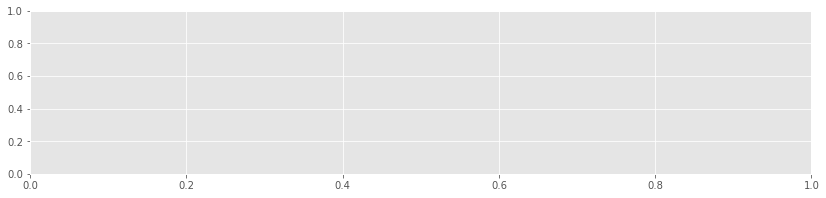

In [85]:
fig, ax = plt.subplots(1, figsize=(14, 3))

plot_cost(ga.cost_record, ax)